### Build masks 
This notebooks shows how to build region masks for the South Atlantic, and Eastern and Western S Atlatic.

In [ ]:
%load_ext autoreload
%autoreload 2
import xarray as xr 
import numpy as np  
import pop_tools
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy
import cartopy.feature as cfeature

%matplotlib inline

### Read the pop 1 deg grid from pop_tools

In [107]:
# Read the pop 1 deg grid from pop_tools
# We will use variables TLONG and TLAT
pop_grid = pop_tools.get_grid('POP_gx1v7')

In [25]:
pop_grid

<xarray.Dataset>
Dimensions:      (nlat: 384, nlon: 320, z_t: 60, z_w: 60, z_w_bot: 60, nreg: 13)
Coordinates:
  * z_t          (z_t) float64 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
  * z_w          (z_w) float64 0.0 1e+03 2e+03 3e+03 ... 4.75e+05 5e+05 5.25e+05
  * z_w_bot      (z_w_bot) float64 1e+03 2e+03 3e+03 ... 5e+05 5.25e+05 5.5e+05
  * nreg         (nreg) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nlat, nlon
Data variables: (12/15)
    TLAT         (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG        (nlat, nlon) float64 320.6 321.7 322.8 ... 318.9 319.4 319.8
    ULAT         (nlat, nlon) float64 -78.95 -78.95 -78.95 ... 72.42 72.41 72.41
    ULONG        (nlat, nlon) float64 321.1 322.3 323.4 ... 319.2 319.6 320.0
    DXT          (nlat, nlon) float64 1.894e+06 1.893e+06 ... 1.473e+06
    DYT          (nlat, nlon) float64 5.94e+06 5.94e+06 ... 5.046e+06 5.046e+06
    ...           ...
    UAREA        (nlat, nlon) float64 1.423e+13 1.423e+13 ... 7.639e+12
    KMT          (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    REGION_MASK  (nlat, nlon) int32 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    dz           (z_t) float64 1e+03 1e+03 1e+03 ... 2.499e+04 2.5e+04 2.5e+04
    region_name  (nreg) <U21 'Black Sea' 'Baltic Sea' ... 'Hudson Bay'
    region_val   (nreg) int64 -13 -12 -5 1 2 3 4 6 7 8 9 10 11
Attributes:
    lateral_dims:       [384, 320]
    vertical_dims:      60
    vert_grid_file:     gx1v7_vert_grid
    horiz_grid_fname:   inputdata/ocn/pop/gx1v7/grid/horiz_grid_20010402.ieeer8
    topography_fname:   inputdata/ocn/pop/gx1v7/grid/topography_20161215.ieeei4
    region_mask_fname:  inputdata/ocn/pop/gx1v7/grid/region_mask_20151008.ieeei4
    type:               dipole
    title:              POP_gx1v7 grid

In [71]:
atl = pop_grid.REGION_MASK.where(pop_grid.REGION_MASK==6)/pop_grid.REGION_MASK.where(pop_grid.REGION_MASK==6)
atl['TLAT'] = pop_grid['TLAT']
atl['TLONG'] = pop_grid['TLONG']
atl = atl.fillna(0)

In [72]:
atl

<xarray.DataArray 'REGION_MASK' (nlat: 384, nlon: 320)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
Dimensions without coordinates: nlat, nlon

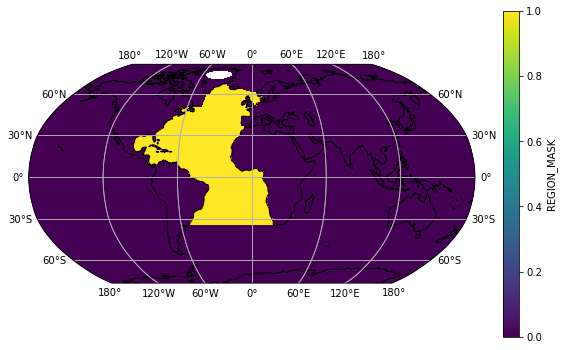

In [74]:
plt.figure(figsize=(10,6));
ax = plt.axes(projection=ccrs.Robinson());
pc = atl.plot.pcolormesh(ax=ax,
                        transform=ccrs.PlateCarree(),
                        x='TLONG',
                        y='TLAT',
                        add_colorbar=True)                                    
ax.gridlines(draw_labels=True);
ax.coastlines()
ax.gridlines();

### South Atlantic Mask

In [89]:
south_atl = atl * atl.where(atl.TLAT<0.)
south_atl = south_atl.fillna(0)

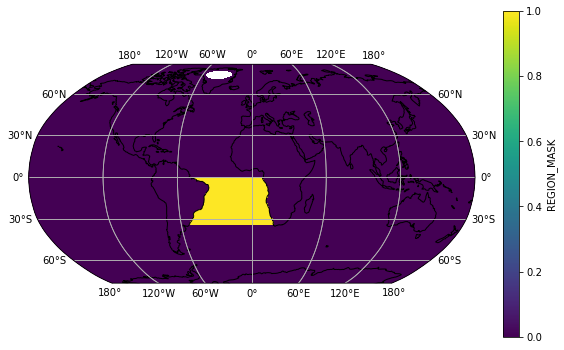

In [91]:
plt.figure(figsize=(10,6));
ax = plt.axes(projection=ccrs.Robinson());
pc = south_atl.plot.pcolormesh(ax=ax,
                              transform=ccrs.PlateCarree(),
                              x='TLONG',
                              y='TLAT')                                    
ax.gridlines(draw_labels=True);
ax.coastlines()
ax.gridlines();

### Western South Atlantic Mask

In [94]:
tmp1 = (south_atl *  south_atl.where(south_atl.TLONG>345)) 
tmp1 = tmp1.fillna(0)
tmp2 = south_atl *  south_atl.where(south_atl.TLONG<15)
tmp2 = tmp2.fillna(0)
west_south_atl = tmp1 + tmp2

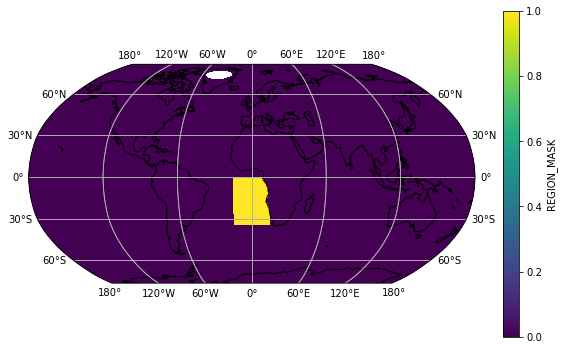

In [95]:
plt.figure(figsize=(10,6));
ax = plt.axes(projection=ccrs.Robinson());
pc = west_south_atl.plot.pcolormesh(ax=ax,
                              transform=ccrs.PlateCarree(),
                              x='TLONG',
                              y='TLAT',
                              add_colorbar=True)                                    
ax.gridlines(draw_labels=True);
ax.coastlines()
ax.gridlines();

### Eastern South Atlantic Mask

In [104]:
east_south_atl = south_atl *  south_atl.where(south_atl.TLONG<345) * south_atl.where(south_atl.TLONG>50)
east_south_atl = east_south_atl.fillna(0)

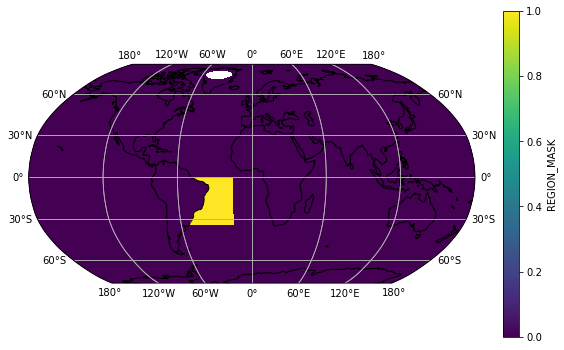

In [105]:
plt.figure(figsize=(10,6));
ax = plt.axes(projection=ccrs.Robinson());
pc = east_south_atl.plot.pcolormesh(ax=ax,
                              transform=ccrs.PlateCarree(),
                              x='TLONG',
                              y='TLAT',
                              add_colorbar=True)                                    
ax.gridlines(draw_labels=True);
ax.coastlines()
ax.gridlines();

In [106]:
east_south_atl

<xarray.DataArray 'REGION_MASK' (nlat: 384, nlon: 320)>
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
Coordinates:
    TLAT     (nlat, nlon) float64 -79.22 -79.22 -79.22 ... 72.2 72.19 72.19
    TLONG    (nlat, nlon) float64 320.6 321.7 322.8 323.9 ... 318.9 319.4 319.8
Dimensions without coordinates: nlat, nlon